------------
![Bluemetrica](../bluemetrica_large.png)

----------


# Seaborn

Seaborn to biblioteka do tworzenia wykresów statystycznych. Nie ma wielu opcji modyfikacji wykresu, ale za to budowa wykresów jest prosta i intuicyjna a stworzone wizualizacje estetyczne.

Dokumentacja:
https://seaborn.pydata.org/

Dostepne style:
https://seaborn.pydata.org/generated/seaborn.set_style.html

Palety kolorystyczne:
https://seaborn.pydata.org/tutorial/color_palettes.html

Przykladowa galeria:
https://seaborn.pydata.org/examples/index.html

In [2]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

## Wczytujemy dane

In [3]:
df = pd.read_csv("../data/storesales.csv")

In [4]:
df.head()

,Date,Store,DayOfWeek,Date.1,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,month,day,dayYear,week_num,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,PromoInterval
0,2013-01-01,39,2,2013-01-01,0,0,0,0,a,1,...,1,1,1,0,a,a,260,10.0,2006.0,"Feb,May,Aug,Nov"
1,2013-01-01,680,2,2013-01-01,0,0,0,0,a,1,...,1,1,1,0,c,a,170,NaN,NaN,"Mar,Jun,Sept,Dec"
2,2013-01-01,1064,2,2013-01-01,0,0,0,0,a,1,...,1,1,1,0,a,c,420,NaN,NaN,NaN
3,2013-02-01,39,3,2013-02-01,4144,608,1,0,0,1,...,1,2,2,0,a,a,260,10.0,2006.0,"Feb,May,Aug,Nov"
4,2013-02-01,680,3,2013-02-01,5459,957,1,0,0,1,...,1,2,2,0,c,a,170,NaN,NaN,"Mar,Jun,Sept,Dec"


### Rozkład jednej zmiennej

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


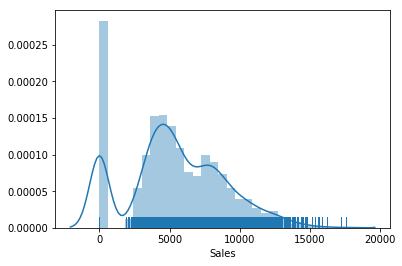

In [6]:
sns.distplot(df['Sales'], rug = True)

### Pomocniczo korzystamy z matplotliba

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


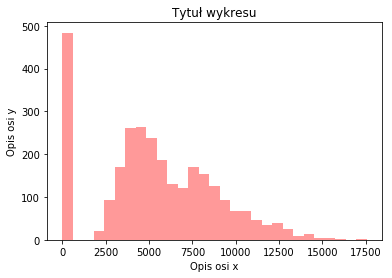

In [15]:
sns.distplot(df['Sales'], color = 'red', norm_hist=False, kde=False)

plt.title("Tytuł wykresu")
plt.xlabel("Opis osi x")
plt.ylabel("Opis osi y")

# plt.savefig("wykres.jpg") # to gdybym chciała zapisać
plt.show() # gdyby to nie byl iPython to na koniec przygotowywania wykresu musimy go pokazać (lub zapisać)

### Rozkład dwóch zmiennych

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


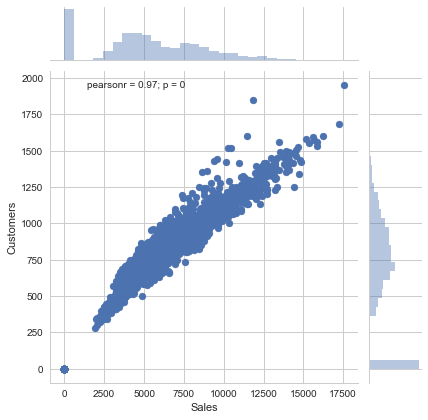

In [19]:
sns.jointplot(x = 'Sales', y = 'Customers', data = df)

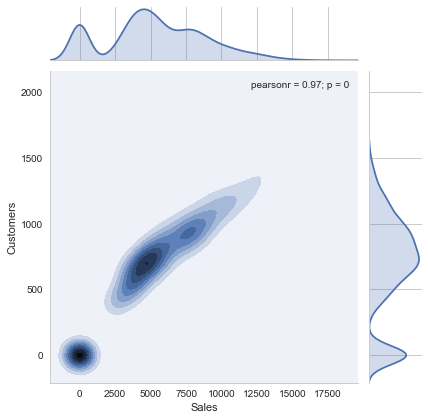

In [18]:
sns.jointplot(x = 'Sales', y = 'Customers', data = df,  kind='kde') # hex lub kde dla dużych danych

### Macierz korelacji

Ustawiam paletę (parametr cmap i centruję ją w 0)

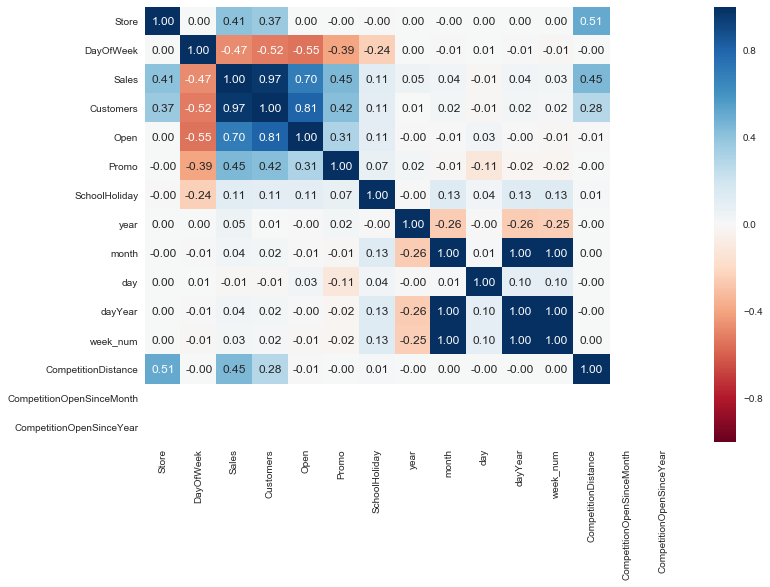

In [33]:
plt.figure(figsize=(12,8)) # ustwaiam rozmiar wykresu

sns.heatmap(df.corr(),
            cmap = "RdBu", cbar = True, # podziałka włączona, paleta RdBu
            center = 0, vmax = 1, vmin = -1,
            annot = True, fmt = ".2f")

## Klastermapa

In [107]:
kor = df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'],
              axis = 1).corr()

<Figure size 864x576 with 0 Axes>

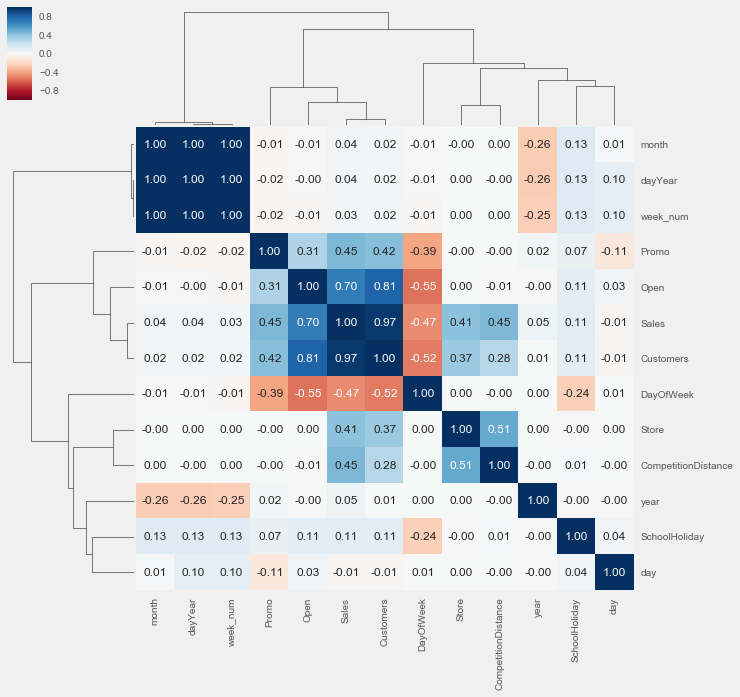

In [115]:
plt.figure(figsize=(12,8)) # ustwaiam rozmiar wykresu

sns.clustermap(kor,
            cmap = "RdBu", cbar = True, # podziałka włączona, paleta RdBu
            center = 0, vmax = 1, vmin = -1,
            annot = True, fmt = ".2f", method='ward')

In [52]:
pivo = pd.pivot_table(df, values='Sales', index='day', columns='Store')

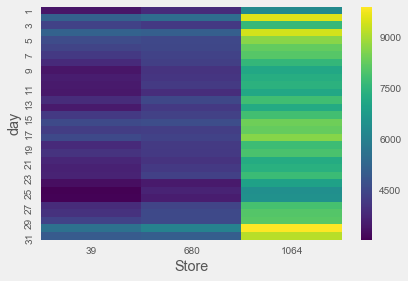

In [110]:
sns.heatmap(pivo, cmap = "viridis")

### Lmplot

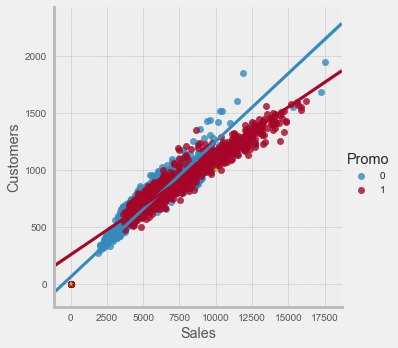

In [120]:
# sns.set_style("whitegrid")
# sns.set_context("notebook") # jak duze są czcionki i wykresy domyslnie
plt.style.use('bmh')

sns.lmplot(x = 'Sales', y = 'Customers', data = df, hue="Promo")
plt.plot([0, 10000], [0, 1000], "y*")

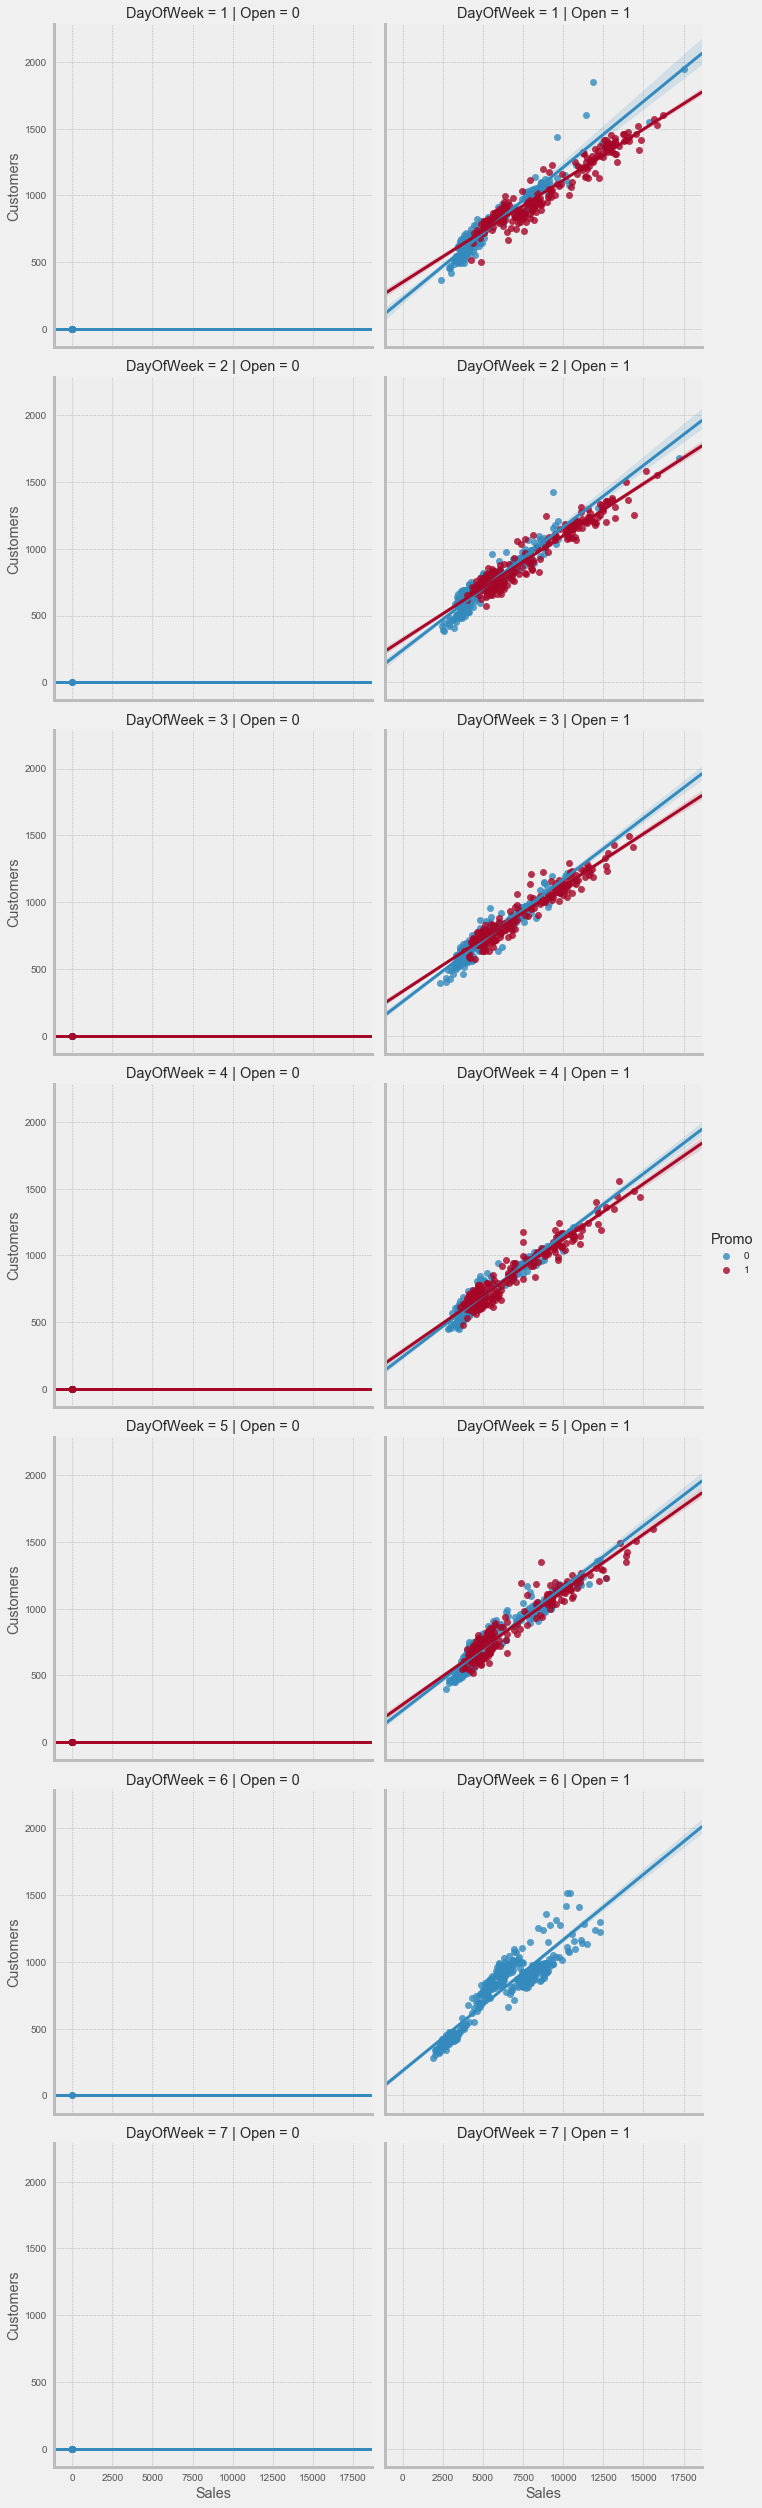

In [78]:
sns.lmplot(x = 'Sales',
           y = 'Customers',
           data = df, hue="Promo",
           col = "Open", row = "DayOfWeek")

### Boxplot i barplot

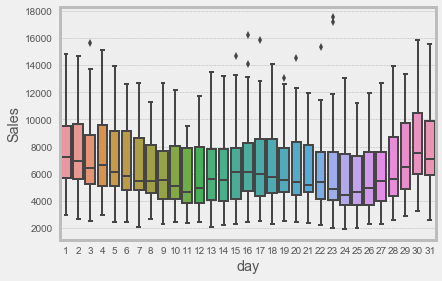

In [80]:
sns.boxplot(x = 'day', y = 'Sales', data = df[df['Open']==1])

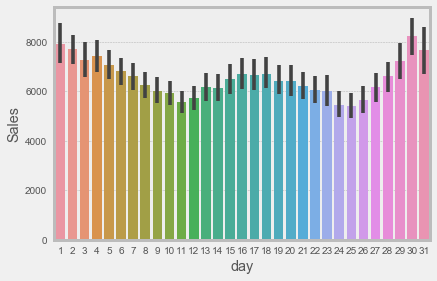

In [83]:
sns.barplot(x = 'day', y = 'Sales', data = df[df['Open']==1])

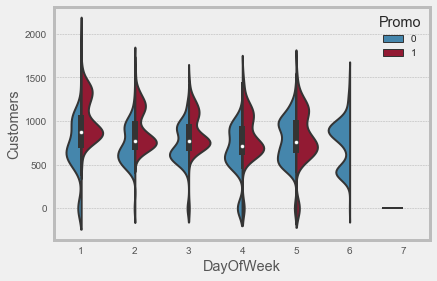

In [88]:
sns.violinplot(x = 'DayOfWeek', y = 'Customers', data = df, hue = 'Promo', split=True)

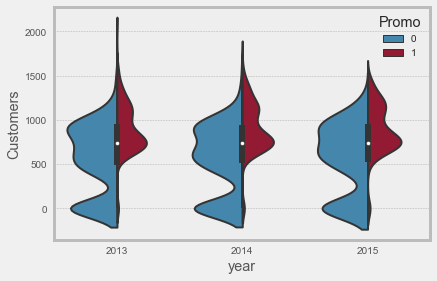

In [99]:
sns.violinplot(x = 'year', y = 'Customers', data = df,
               scale = 'count', hue = 'Promo', split=True)